In [240]:
import matplotlib.pyplot as plt
import torch
from pathlib import PurePath
import dill as pickle
from config import *
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import pandas as pd

In [241]:
grid_N = 65
grid_N_plot = 33
modelName = "Two_Dim_DefDifONet"

In [242]:
with open(PurePath(pathTrainedModels, modelName +".pkl"), "rb") as f:
    model = pickle.load(f).to("cuda:0")

In [243]:
def energyNNModel(xy,q11, q12 ):
    '''
    Computes the LDG energy for a torch model. This uses autograd, hence pytorch.
    '''
    eps = 0.02
    batchSize = q11.shape[0]
    q11_gradient = torch.autograd.grad(q11.view(-1,1), xy,
                                     torch.ones((batchSize, 1), requires_grad = True).to("cuda"),
                                       allow_unused=True, create_graph=True)[0]
    q12_gradient = torch.autograd.grad(q12.view(-1,1), xy,
                                     torch.ones((batchSize, 1), requires_grad = True).to("cuda"),
                                       allow_unused=True, create_graph=True)[0]
    energiesAtPoints = q11_gradient[:,0] **2 + q11_gradient[:,1] **2 +q12_gradient[:,0] **2 +q12_gradient[:,1] **2 + (1/eps) **2 * (q11 **2 + q12 **2 -1)**2

    return torch.nanmean(energiesAtPoints)


In [244]:
def l2Difference(x1, y1,Q11_1, Q12_1, x2, y2,Q11_2, Q12_2 ):
    '''
    Computes the L2 Difference of the respective funcitons under the assumption, that the x and y coordinates contain the same values, but in different orderings, i.e. same grid but different ordering of the points in the grid.
    '''

    df1_by_x = pd.DataFrame({"x":x1, "y":y1, "q11":Q11_1.reshape(-1), "q12":Q12_1.reshape(-1)})
    df1_by_x = df1_by_x.sort_values(by=["x", "y"])

    df2_by_x = pd.DataFrame({"x":x2, "y":y2, "q11":Q11_2.reshape(-1), "q12":Q12_2.reshape(-1)})
    df2_by_x = df2_by_x.sort_values(by=["x", "y"])

    q11_1 = df1_by_x["q11"].to_numpy()
    q12_1 = df1_by_x["q12"].to_numpy()

    q11_2 = df2_by_x["q11"].to_numpy()
    q12_2 = df2_by_x["q12"].to_numpy()

    return np.sqrt(np.nanmean( (q11_1 - q11_2)**2 + (q12_1 - q12_2)**2) )




In [245]:
xs = torch.linspace(0.0, 1.0, grid_N_plot, device="cpu")
ys = torch.linspace(0.0, 1.0, grid_N_plot, device="cpu")

X, Y = torch.meshgrid(xs, ys, indexing='xy')
jointInputVec_plot = torch.cat((X.reshape(-1,1),Y.reshape(-1,1)) , dim = 1 ).to("cuda")
jointInputVec_plot.requires_grad = True

modelOut = model( jointInputVec_plot)

Q11_torch_plot = modelOut['out1']
Q12_torch_plot = modelOut['out2']

Q11_NN_plot = []
Q12_NN_plot = []

Q11_NN_plot.append(Q11_torch_plot[3].detach().cpu().numpy())
Q12_NN_plot.append(Q12_torch_plot[3].detach().cpu().numpy())

Q11_NN_plot.append(Q11_torch_plot[4].detach().cpu().numpy())
Q12_NN_plot.append(Q12_torch_plot[4].detach().cpu().numpy())

Q11_NN_plot.append(Q11_torch_plot[5].detach().cpu().numpy())
Q12_NN_plot.append(Q12_torch_plot[5].detach().cpu().numpy())

Q11_NN_plot.append(Q11_torch_plot[0].detach().cpu().numpy())
Q12_NN_plot.append(Q12_torch_plot[0].detach().cpu().numpy())

Q11_NN_plot.append(Q11_torch_plot[2].detach().cpu().numpy())
Q12_NN_plot.append(Q12_torch_plot[2].detach().cpu().numpy())

Q11_NN_plot.append(Q11_torch_plot[1].detach().cpu().numpy())
Q12_NN_plot.append(Q12_torch_plot[1].detach().cpu().numpy())
    

In [282]:
xs = torch.linspace(0.0, 1.0, grid_N, device="cpu")
ys = torch.linspace(0.0, 1.0, grid_N, device="cpu")

X, Y = torch.meshgrid(xs, ys, indexing='xy')
jointInputVec = torch.cat((X.reshape(-1,1),Y.reshape(-1,1)) , dim = 1 ).to("cuda")
jointInputVec.requires_grad = True

modelOut = model( jointInputVec)

Q11_torch = modelOut['out1']
Q12_torch = modelOut['out2']

Q11_NN = []
Q12_NN = []

Q11_NN.append(Q11_torch[3].detach().cpu().numpy())
Q12_NN.append(Q12_torch[3].detach().cpu().numpy())

Q11_NN.append(Q11_torch[4].detach().cpu().numpy())
Q12_NN.append(Q12_torch[4].detach().cpu().numpy())

Q11_NN.append(Q11_torch[5].detach().cpu().numpy())
Q12_NN.append(Q12_torch[5].detach().cpu().numpy())

Q11_NN.append(Q11_torch[0].detach().cpu().numpy())
Q12_NN.append(Q12_torch[0].detach().cpu().numpy())

Q11_NN.append(Q11_torch[2].detach().cpu().numpy())
Q12_NN.append(Q12_torch[2].detach().cpu().numpy())

Q11_NN.append(Q11_torch[1].detach().cpu().numpy())
Q12_NN.append(Q12_torch[1].detach().cpu().numpy())
    

In [255]:
x_plot = jointInputVec_plot[:, 0].detach().cpu().numpy().reshape(-1)
y_plot = jointInputVec_plot[:, 1].detach().cpu().numpy().reshape(-1)

In [284]:
x = jointInputVec[:, 0].detach().cpu().numpy().reshape(-1)
y = jointInputVec[:, 1].detach().cpu().numpy().reshape(-1)

In [257]:
res1 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R1.mat")
res2 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R2.mat")
res3 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R3.mat")
res4 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_R4.mat")
res5 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_15112024.mat")
res6 = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_D2.mat")
coordinates = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_test.mat")

In [258]:
D1_fem = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_LDG_D1_solution.mat")
D2_fem = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_LDG_D2_solution.mat")
R1_fem = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_LDG_R1_solution.mat")
R2_fem = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_LDG_R2_solution.mat")
R3_fem = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_LDG_R3_solution.mat")
R4_fem = scipy.io.loadmat("data/Reduced2DimLDG/trueSolution/data_LDG_R4_solution.mat")

In [259]:
R4_fem["Energy"]

array([[87.55809875]])

In [260]:
energyNNModel(jointInputVec,Q11_torch[3], Q12_torch[3] )

tensor(192.1681, device='cuda:0', grad_fn=<DivBackward0>)

In [261]:
x.reshape(-1)

array([0.     , 0.03125, 0.0625 , ..., 0.9375 , 0.96875, 1.     ],
      shape=(1089,), dtype=float32)

In [262]:
xy = D1_fem["c4n"]
Q11_D1 = D1_fem["p1"]
Q12_D1 = D1_fem["q1"]

Q11_D2 = D2_fem["p1"]
Q12_D2 = D2_fem["q1"]

Q11_R1 = R1_fem["p1"]
Q12_R1 = R1_fem["q1"]

Q11_R2 = R2_fem["p1"]
Q12_R2 = R2_fem["q1"]

Q11_R3 = R3_fem["p1"]
Q12_R3 = R3_fem["q1"]

Q11_R4 = R4_fem["p1"]
Q12_R4 = R4_fem["q1"]

In [263]:
Q11_fem = []
Q12_fem = []

Q11_fem.append(Q11_D1)
Q12_fem.append(Q12_D1)

Q11_fem.append(Q11_D2)
Q12_fem.append(Q12_D2)

Q11_fem.append(Q11_R1)
Q12_fem.append(Q12_R1)

Q11_fem.append(Q11_R2)
Q12_fem.append(Q12_R2)

Q11_fem.append(Q11_R3)
Q12_fem.append(Q12_R3)

Q11_fem.append(Q11_R4)
Q12_fem.append(Q12_R4)


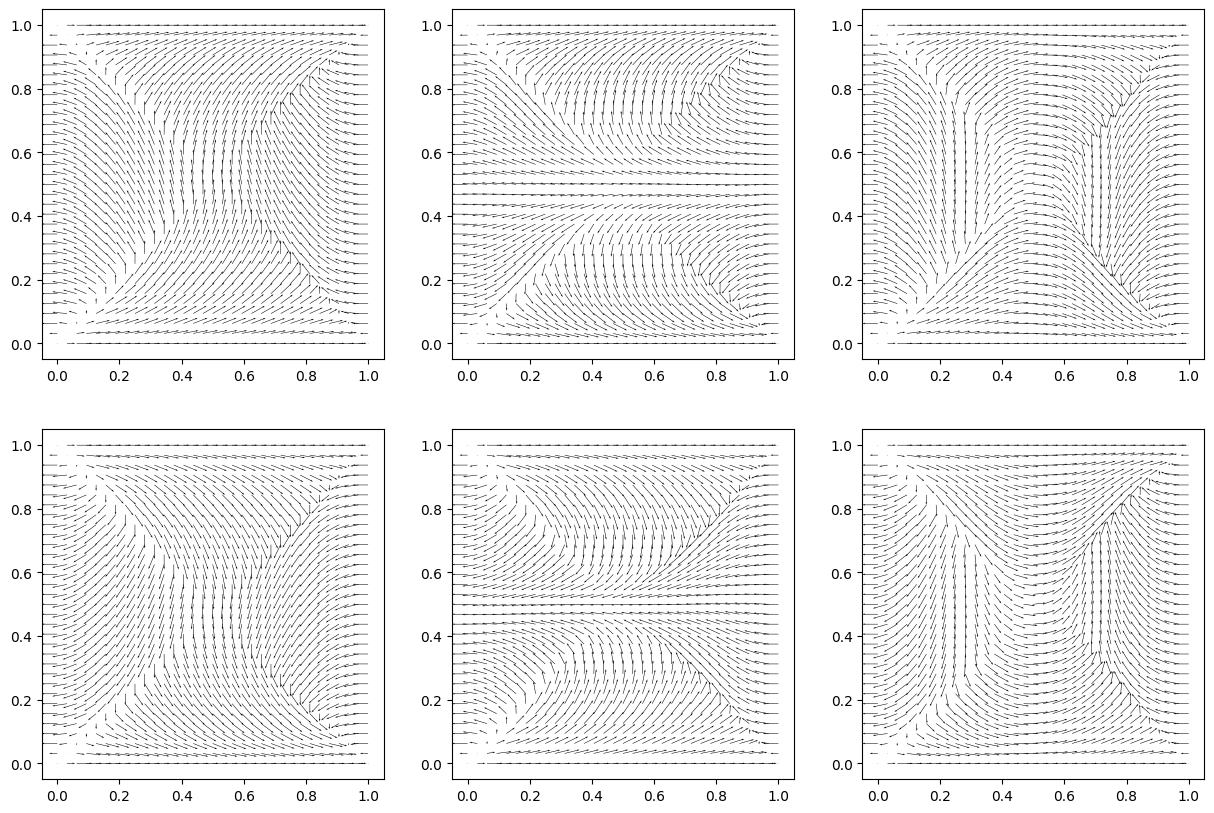

In [264]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0,0].quiver(
                x, y,                             
                Q11_NN_plot[0],
                Q12_NN_plot[0],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,0].quiver(
                x, y,                             
                Q11_NN_plot[1],
                Q12_NN_plot[1],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[0,1].quiver(
                x, y,                             
                Q11_NN_plot[2],
                Q12_NN_plot[2],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,1].quiver(
                x, y,                             
                Q11_NN_plot[3],
                Q12_NN_plot[3],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[0,2].quiver(
                x, y,                             
                Q11_NN_plot[4],
                Q12_NN_plot[4],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,2].quiver(
                x, y,                             
                Q11_NN_plot[5],
                Q12_NN_plot[5],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )

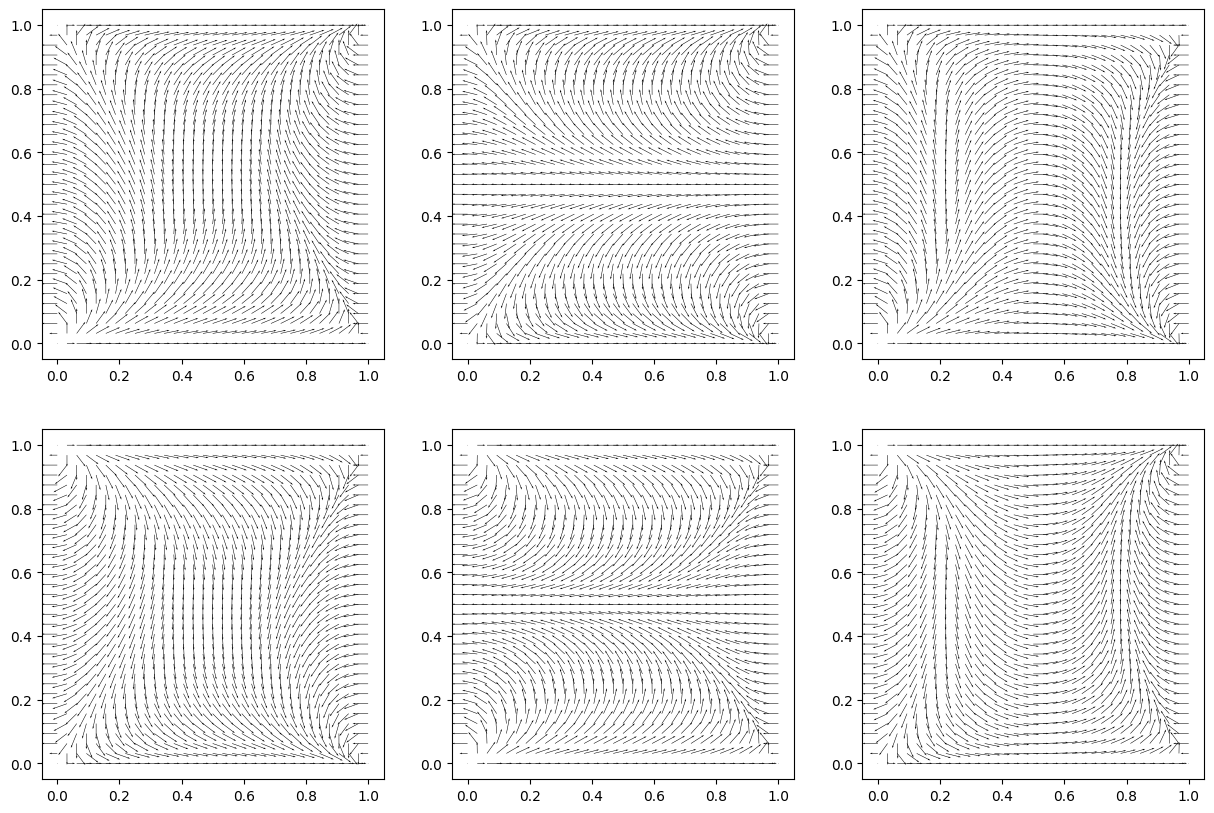

In [265]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0,0].quiver(
                xy[:33*33,0], xy[:33*33,1],                             
                Q11_fem[0][:33*33],
                Q12_fem[0][:33*33],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,0].quiver(
                xy[:33*33,0], xy[:33*33,1],                             
                Q11_fem[1][:33*33],
                Q12_fem[1][:33*33],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[0,1].quiver(
                xy[:33*33,0], xy[:33*33,1],                             
                Q11_fem[2][:33*33],
                Q12_fem[2][:33*33],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,1].quiver(
                xy[:33*33,0], xy[:33*33,1],                             
                Q11_fem[3][:33*33],
                Q12_fem[3][:33*33],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[0,2].quiver(
                xy[:33*33,0], xy[:33*33,1],                             
                Q11_fem[4][:33*33],
                Q12_fem[4][:33*33],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )
ax[1,2].quiver(
                xy[:33*33,0], xy[:33*33,1],                             
                Q11_fem[5][:33*33],
                Q12_fem[5][:33*33],      
                angles='xy', scale_units='xy', scale=20, width=0.0015
                )

## L2 Differences

In [293]:
# D1 L2-Difference
i = 0
l2Difference(xy[:,0], xy[:,1],Q11_fem[i], Q12_fem[i], x, y , Q11_NN[i], Q12_NN[i] ).item()

0.27622702324371073

In [294]:
# D2 L2-Difference
i = 1
l2Difference(xy[:,0], xy[:,1],Q11_fem[i], Q12_fem[i], x, y , Q11_NN[i], Q12_NN[i] ).item()

0.2760401077943141

In [295]:
# R1 L2-Difference
i = 2
l2Difference(xy[:,0], xy[:,1],Q11_fem[i], Q12_fem[i], x, y , Q11_NN[i], Q12_NN[i] ).item()

0.3011316022318101

In [296]:
# R2 L2-Difference
i = 3
l2Difference(xy[:,0], xy[:,1],Q11_fem[i], Q12_fem[i], x, y , Q11_NN[i], Q12_NN[i] ).item()

0.3020130654817442

In [297]:
# R3 L2-Difference
i = 4
l2Difference(xy[:,0], xy[:,1],Q11_fem[i], Q12_fem[i], x, y , Q11_NN[i], Q12_NN[i] ).item()

0.29217842287621554

In [298]:
# R4 L2-Difference
i = 5
l2Difference(xy[:,0], xy[:,1],Q11_fem[i], Q12_fem[i], x, y , Q11_NN[i], Q12_NN[i] ).item()

0.29160429683719397

## Energies 

In [300]:
# D1 Energy
i = 0
print(f"Energy Deflation-PINN solution for D1 {energyNNModel(jointInputVec,Q11_torch[i], Q12_torch[i] )}")
print(f"Energy FEM solution for D1 {D1_fem["Energy"][0,0]}")

Energy Deflation-PINN solution for D1 229.45013427734375
Energy FEM solution for D1 78.90363868801421


In [301]:
# D2 Energy
i = 1
print(f"Energy Deflation-PINN solution for D2 {energyNNModel(jointInputVec,Q11_torch[i], Q12_torch[i] )}")
print(f"Energy FEM solution for D2 {D2_fem["Energy"][0,0]}")

Energy Deflation-PINN solution for D2 219.58010864257812
Energy FEM solution for D2 78.90363868801421


In [302]:
# R1 Energy
i = 2
print(f"Energy Deflation-PINN solution for R1 {energyNNModel(jointInputVec,Q11_torch[i], Q12_torch[i] )}")
print(f"Energy FEM solution for R1 {R1_fem["Energy"][0,0]}")

Energy Deflation-PINN solution for R1 218.76211547851562
Energy FEM solution for R1 87.55809875432925


In [303]:
# R2 Energy
i = 3
print(f"Energy Deflation-PINN solution for R2 {energyNNModel(jointInputVec,Q11_torch[i], Q12_torch[i] )}")
print(f"Energy FEM solution for R2 {R2_fem["Energy"][0,0]}")

Energy Deflation-PINN solution for R2 191.16128540039062
Energy FEM solution for R2 87.55809875432928


In [304]:
# R3 Energy
i = 4
print(f"Energy Deflation-PINN solution for R3 {energyNNModel(jointInputVec,Q11_torch[i], Q12_torch[i] )}")
print(f"Energy FEM solution for R3 {R3_fem["Energy"][0,0]}")

Energy Deflation-PINN solution for R3 190.96817016601562
Energy FEM solution for R3 87.55809875432932


In [305]:
# R4 Energy
i = 5
print(f"Energy Deflation-PINN solution for R4 {energyNNModel(jointInputVec,Q11_torch[i], Q12_torch[i] )}")
print(f"Energy FEM solution for R4 {R4_fem["Energy"][0,0]}")

Energy Deflation-PINN solution for R4 228.65081787109375
Energy FEM solution for R4 87.55809875432932
